<a href="https://colab.research.google.com/github/FlavioNovaes/IAUGB6p/blob/main/Trabalho_IA_2_Bim_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras import backend as K
from keras import utils as utls
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
# Definição de Hiperparâmetros
imageRows, imageCols, cores = 32, 32, 3
batchSize = 64
numClasses = 10
epochs = 5

In [ ]:
# Carrega o dataset CIFAR-10
(XTreino, yTreino), (XTeste, yTeste) = cifar10.load_data()

In [ ]:
# Normaliza os dados
XTreino = XTreino / 255.0
XTeste = XTeste / 255.0
yTreino = utls.to_categorical(yTreino, numClasses)
yTeste = utls.to_categorical(yTeste, numClasses)

In [ ]:
XTreino.shape

(50000, 32, 32, 3)

In [ ]:
inputShape = (imageRows, imageCols, cores)

In [ ]:
# Modelo Lenet
model = Sequential()
model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(50, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(numClasses))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 20)          │           1,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32, 32, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 50)          │          25,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 16, 16, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │       1,600,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,632,080 (6.23 MB)

 Trainable params: 1,632,080 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
minhaLeNetModel = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 181ms/step - accuracy: 0.4111 - loss: 1.6180 - val_accuracy: 0.5972 - val_loss: 1.1309
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.6351 - loss: 1.0300 - val_accuracy: 0.6580 - val_loss: 0.9843
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 181ms/step - accuracy: 0.7116 - loss: 0.8299 - val_accuracy: 0.6857 - val_loss: 0.9027
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.7688 - loss: 0.6671 - val_accuracy: 0.7047 - val_loss: 0.8667
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 181ms/step - accuracy: 0.8160 - loss: 0.5264 - val_accuracy: 0.7070 - val_loss: 0.8850


In [ ]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
              precision    recall  f1-score   support

       avião       0.82      0.70      0.75      1000
       carro       0.89      0.75      0.82      1000
     pássaro       0.64      0.61      0.62      1000
        gato       0.52      0.55      0.53      1000
       cervo       0.63      0.65      0.64      1000
    cachorro       0.56      0.63      0.59      1000
        sapo       0.86      0.69      0.77      1000
      cavalo       0.71      0.83      0.76      1000
       navio       0.85      0.81      0.83      1000
    caminhão       0.72      0.85      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



Text(0, 0.5, 'Acurácia')

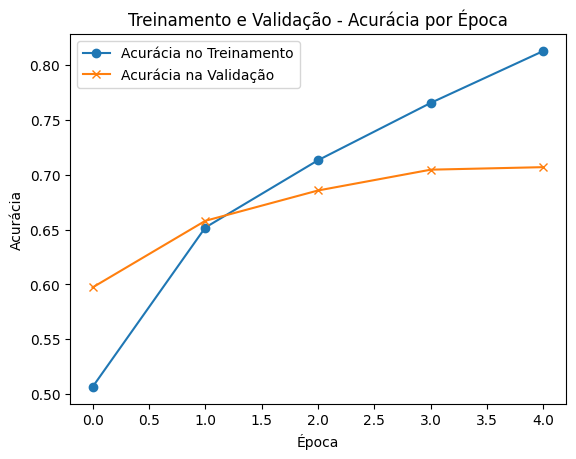

In [ ]:
f, ax = plt.subplots()
ax.plot(minhaLeNetModel.history['accuracy'], 'o-')
ax.plot(minhaLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')

In [ ]:
# Modelo VGGNet
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(numClasses))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,122,186 (8.10 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
minhaVGGNetModel = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_data=(XTeste, yTeste))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 157ms/step - accuracy: 0.3225 - loss: 1.8566 - val_accuracy: 0.5308 - val_loss: 1.3530
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 156ms/step - accuracy: 0.5304 - loss: 1.3149 - val_accuracy: 0.6261 - val_loss: 1.0598
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.5931 - loss: 1.1331 - val_accuracy: 0.6548 - val_loss: 0.9903
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 150ms/step - accuracy: 0.6364 - loss: 1.0298 - val_accuracy: 0.6794 - val_loss: 0.9288
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 150ms/step - accuracy: 0.6596 - loss: 0.9679 - val_accuracy: 0.6916 - val_loss: 0.8930


In [ ]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
              precision    recall  f1-score   support

       avião       0.74      0.70      0.72      1000
       carro       0.81      0.83      0.82      1000
     pássaro       0.49      0.67      0.56      1000
        gato       0.52      0.47      0.49      1000
       cervo       0.61      0.67      0.64      1000
    cachorro       0.59      0.62      0.60      1000
        sapo       0.82      0.73      0.77      1000
      cavalo       0.79      0.74      0.76      1000
       navio       0.85      0.77      0.81      1000
    caminhão       0.83      0.72      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



Text(0, 0.5, 'Acurácia')

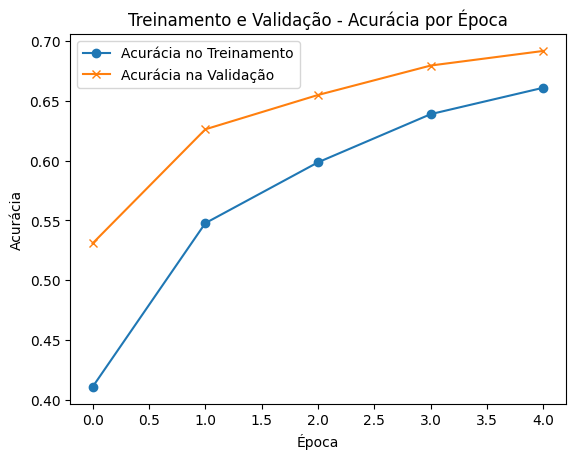

In [ ]:
f, ax = plt.subplots()
ax.plot(minhaVGGNetModel.history['accuracy'], 'o-')
ax.plot(minhaVGGNetModel.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('VGG - Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')

In [ ]:
# Model / data parameters
num_classes = numClasses
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(XTreino, yTreino), (XTeste, yTeste) = cifar10.load_data()

# Scale images to the [0, 1] range
XTreino = XTreino.astype("float32") / 255
XTeste = XTeste.astype("float32") / 255
# Make sure images have shape (32, 32, 1)
XTreino = np.expand_dims(XTreino, -1)
XTeste = np.expand_dims(XTeste, -1)
print("XTreino shape:", XTreino.shape)
print(XTreino.shape[0], "train samples")
print(XTeste.shape[0], "test samples")

# convert class vectors to binary class matrices
yTreino = utls.to_categorical(yTreino, num_classes)
yTeste = utls.to_categorical(yTeste, num_classes)

XTreino shape: (50000, 32, 32, 3, 1)
50000 train samples
10000 test samples


In [ ]:
# Modelo ConvNET

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(numClasses))
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │          40,970 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,362 (235.79 KB)

 Trainable params: 60,362 (235.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

minhaCONVNET = model.fit(XTreino, yTreino, batch_size=batchSize, epochs=epochs, validation_split=0.1)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 90s 126ms/step - accuracy: 0.3655 - loss: 1.7557 - val_accuracy: 0.5536 - val_loss: 1.2901
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.5525 - loss: 1.2726 - val_accuracy: 0.6134 - val_loss: 1.1371
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 138s 126ms/step - accuracy: 0.5920 - loss: 1.1673 - val_accuracy: 0.5980 - val_loss: 1.1624
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 145s 130ms/step - accuracy: 0.6150 - loss: 1.0980 - val_accuracy: 0.6330 - val_loss: 1.0591
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 139s 126ms/step - accuracy: 0.6330 - loss: 1.0593 - val_accuracy: 0.6588 - val_loss: 1.0023


In [ ]:
nomeDosRotulos = ["avião", "carro", "pássaro", "gato", "cervo", "cachorro", "sapo", "cavalo", "navio", "caminhão"]
predicao = model.predict(XTeste)
print(classification_report(yTeste.argmax(axis=1), predicao.argmax(axis=1), target_names=nomeDosRotulos))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
              precision    recall  f1-score   support

       avião       0.71      0.65      0.67      1000
       carro       0.72      0.82      0.77      1000
     pássaro       0.57      0.40      0.47      1000
        gato       0.46      0.53      0.49      1000
       cervo       0.55      0.65      0.59      1000
    cachorro       0.62      0.46      0.53      1000
        sapo       0.74      0.74      0.74      1000
      cavalo       0.73      0.71      0.72      1000
       navio       0.66      0.80      0.73      1000
    caminhão       0.71      0.71      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



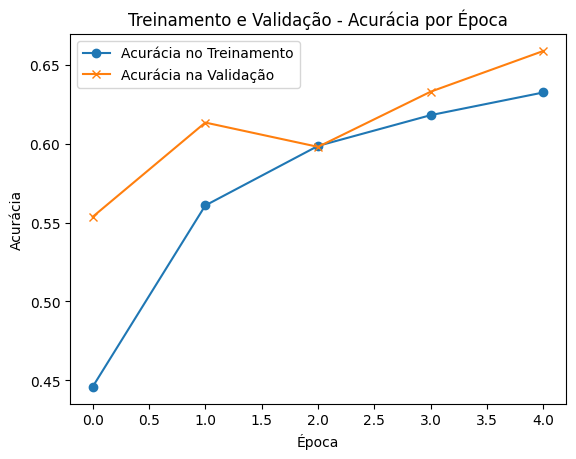

In [ ]:
f, ax = plt.subplots()
ax.plot(minhaCONVNET.history['accuracy'], 'o-')
ax.plot(minhaCONVNET.history['val_accuracy'], 'x-')
ax.legend(['Acurácia no Treinamento', 'Acurácia na Validação'], loc=0)
ax.set_title('Treinamento e Validação - Acurácia por Época')
ax.set_xlabel('Época')
ax.set_ylabel('Acurácia')
plt.show()